## Multi-label classification

### TO DO

- reduce learning rate?
- trai again?


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.conv_learner import *
from fastai.plots import *

# Py file for planet competition
from planet import f2

In [7]:
PATH = 'data/planet/'

In [8]:
ls {PATH}

models/                   test-jpg/                 tmp/        train_v2.csv
sample_submission_v2.csv  test_v2_file_mapping.csv  train-jpg/


In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [5]:
# F2 for this competiotion
metrics=[f2]

# Using Resnext from pytorch 
f_model = resnet50
sz=64

label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = [0]

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [6]:
def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train-jpg',
                                        label_csv, 
                                        bs=124,
                                        tfms=tfms,
                                        suffix='.jpg', 
                                        val_idxs=val_idxs, 
                                        test_name='test-jpg')

In [7]:
sz=64

In [8]:
data = get_data(sz)

In [9]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [11]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
learn.load('resnet50_256')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.132511   0.028245   1.0       



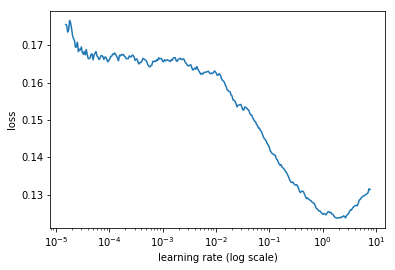

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [14]:
lr = 0.2

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.112278   0.078242   0.909091  
    1      0.107721   0.07906    0.909091                    
    2      0.104464   0.075112   0.909091                    
    3      0.105595   0.083405   0.909091                    
    4      0.105154   0.067426   0.909091                    
    5      0.103729   0.076408   0.909091                    
    6      0.10323    0.081328   0.909091                    



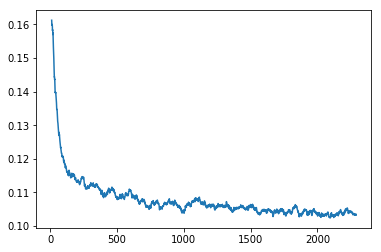

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

In [16]:
lrs = np.array([lr/9,lr/3,lr])

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.098746   0.082445   0.909091  
    1      0.095367   0.06569    0.909091                     
    2      0.089792   0.069114   0.909091                     
    3      0.095628   0.065013   0.909091                     
    4      0.090372   0.065307   0.909091                     
    5      0.086483   0.060334   0.909091                     
    6      0.084455   0.05686    0.909091                     



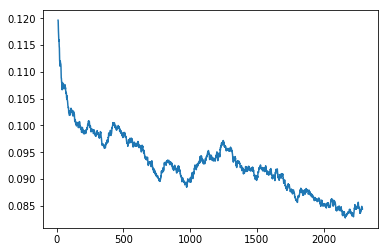

In [17]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

#### Change size to 128 x 128

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.083085   0.124665   0.909091  
    1      0.084688   0.122046   0.909091                     
    2      0.080471   0.108134   0.909091                     
    3      0.082698   0.128882   0.909091                     
    4      0.080425   0.102959   0.909091                     
    5      0.080555   0.100645   0.909091                     
    6      0.078984   0.115359   0.909091                     



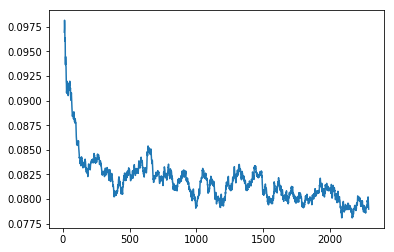

In [18]:
sz=128

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.079914   0.06807    0.909091  
    1      0.081515   0.063364   0.909091                     
    2      0.076309   0.103147   0.909091                     
    3      0.081237   0.133284   0.909091                     
    4      0.075702   0.075154   0.909091                     
    5      0.070854   0.079602   0.909091                     
    6      0.069573   0.103956   0.909091                     



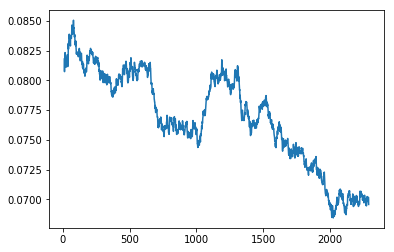

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save('resnet50_128_NOVAL')
learn.sched.plot_loss()

#### Change size to 256 x 256

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.079043   0.14681    0.909091  
    1      0.076868   0.122374   0.909091                     
    2      0.078027   0.13475    0.909091                     
    3      0.079431   0.112666   0.909091                     
    4      0.077521   0.123196   0.909091                     
    5      0.077756   0.11055    0.909091                     
    6      0.076544   0.114328   0.909091                     



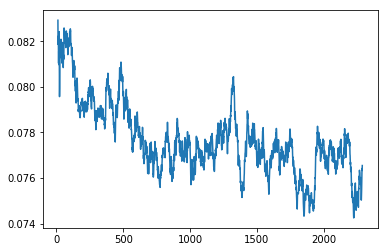

In [20]:
sz=256

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.076791   0.140675   0.909091  
    1      0.076513   0.124726   0.909091                     
    2      0.072017   0.130114   0.909091                     
    3      0.077004   0.124699   0.909091                     
    4      0.073101   0.096128   0.909091                     
    5      0.069951   0.104155   0.909091                     
    6      0.066201   0.092622   0.909091                     



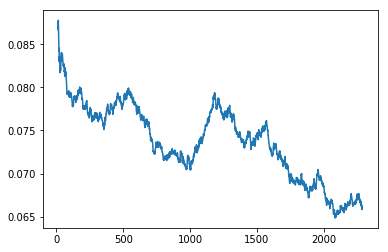

In [21]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save('resnet50_256_NOVAL')
learn.sched.plot_loss()

### End

In [4]:
sz=256

def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train-jpg',
                                        label_csv, 
                                        bs=36,
                                        tfms=tfms,
                                        suffix='.jpg', 
                                        val_idxs=val_idxs, 
                                        test_name='test-jpg')
                                        
data = get_data(sz)
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
learn.load('resnet50_256_NOVAL')

NameError: name 'tfms_from_model' is not defined

In [3]:
%time prob_preds = learn.predict(is_test=True)

NameError: name 'learn' is not defined

In [ ]:
%time prob_preds, _ = learn.TTA(is_test=True)

In [2]:
import numpy as np

classes = np.array(data.classes, dtype=str)
res = [" ".join(classes[np.where(pp > 0.2)]) for pp in prob_preds[0]] 

test_fnames = [os.path.basename(f).split(".")[0] for f in data.test_ds.fnames]
test_df = pd.DataFrame(res, index=test_fnames, columns=['tags'])

test_df.to_csv('planet_resnet50_NOVAL.csv', index_label='image_name')

NameError: name 'data' is not defined

In [ ]:
from IPython.display import FileLink
FileLink('planet_resnet50_NOVAL.csv')